<a href="https://colab.research.google.com/drive/14t_244P052imNz9nG7PYX0h3wVLoldp0" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab"/></a>

In [1]:
!pip install torch_lr_finder
! git clone https://github.com/ak112/pytorch-main-eva8
!mv pytorch-main-eva8/* .
from utils.utils import *
from models.model9 import *
from main import *

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Cloning into 'pytorch-main-eva8'...
remote: Enumerating objects: 83, done.
remote: Counting objects: 100% (83/83), done.
remote: Compressing objects: 100% (63/63), done.
remote: Total 83 (delta 27), reused 65 (delta 15), pack-reused 0
Unpacking objects: 100% (83/83), 20.38 KiB | 1.20 MiB/s, done.


### Dataloader Arguments & Test/Train Dataloaders

In [2]:
cifar10 = dataset_cifar10(batch_size=512)
trainloader = cifar10.loader(train_flag=True)
testloader = cifar10.loader(train_flag=False)
classes = cifar10.classes

CUDA availability ? True


/usr/local/lib/python3.8/dist-packages/albumentations/augmentations/dropout/cutout.py:50: FutureWarning: Cutout has been deprecated. Please use CoarseDropout
  warnings.warn(


  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./Data/cifar-10-python.tar.gz to ./Data
Files already downloaded and verified


### Model and Params

In [3]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = BaseTransformer().to(device)
summary(model, input_size=(3, 32, 32))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 32, 32]             448
            Conv2d-2           [-1, 32, 32, 32]           4,640
            Conv2d-3           [-1, 48, 32, 32]          13,872
 AdaptiveAvgPool2d-4             [-1, 48, 1, 1]               0
            Linear-5                    [-1, 8]             392
            Linear-6                    [-1, 8]             392
            Linear-7                    [-1, 8]             392
            Linear-8                   [-1, 48]             432
      UltimusBlock-9                   [-1, 48]               0
           Linear-10                    [-1, 8]             392
           Linear-11                    [-1, 8]             392
           Linear-12                    [-1, 8]             392

### Finding LR(One Cycle policy)

  0%|          | 0/200 [00:00<?, ?it/s]

Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 2.58E-01


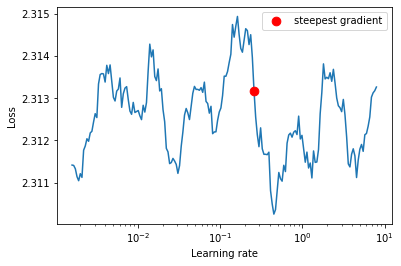

Max LR is 0.4500557675700497


In [5]:
import copy
from torch_lr_finder import LRFinder
import torch.nn as nn
import numpy as np

net_exp = copy.deepcopy(model)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()
lr_finder = LRFinder(net_exp, optimizer, criterion, device=device)
lr_finder.range_test(trainloader, end_lr=10, num_iter=200,step_mode="exp")
lr_finder.plot()
min_loss = min(lr_finder.history['loss'])
ler_rate = lr_finder.history['lr'][np.argmin(lr_finder.history['loss'], axis=0)]
print("Max LR is {}".format(ler_rate))
     

In [6]:
epochs=24
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer, 
                                                max_lr=0.45,
                                                total_steps=2400,
                                                steps_per_epoch=len(trainloader),
                                                epochs=24,
                                                pct_start=5/epochs,
                                                div_factor=10,
                                                three_phase=False, 
                                                final_div_factor=50,
                                                anneal_strategy='linear',
                                                cycle_momentum=True,
                                                base_momentum=0.85
                                                )
net, history = fit_model(
    net=model, device=device,
    criterion = nn.CrossEntropyLoss(),
    train_loader=trainloader, test_loader=testloader,
    optimizer=optimizer, 
    scheduler=scheduler, 
    NUM_EPOCHS=24
)

EPOCH: 1 (LR: 0.045)


Batch_id=97 Loss=3.69200 Accuracy=9.97%: 100%|██████████| 98/98 [00:12<00:00,  7.64it/s]



Test set: Average loss: 2.3656, Accuracy: 1000/10000 (10.00%)

EPOCH: 2 (LR: 0.12453907815631263)


Batch_id=97 Loss=2.31956 Accuracy=9.83%: 100%|██████████| 98/98 [00:12<00:00,  7.71it/s]



Test set: Average loss: 2.3111, Accuracy: 1000/10000 (10.00%)

EPOCH: 3 (LR: 0.20407815631262527)


Batch_id=97 Loss=2.31344 Accuracy=9.99%: 100%|██████████| 98/98 [00:13<00:00,  7.48it/s]



Test set: Average loss: 2.3066, Accuracy: 1000/10000 (10.00%)

EPOCH: 4 (LR: 0.2836172344689379)


Batch_id=97 Loss=2.31458 Accuracy=9.98%: 100%|██████████| 98/98 [00:12<00:00,  7.58it/s]



Test set: Average loss: 2.3170, Accuracy: 1000/10000 (10.00%)

EPOCH: 5 (LR: 0.3631563126252505)


Batch_id=97 Loss=nan Accuracy=9.95%: 100%|██████████| 98/98 [00:12<00:00,  7.67it/s]



Test set: Average loss: nan, Accuracy: 1000/10000 (10.00%)

EPOCH: 6 (LR: 0.4426953907815631)


Batch_id=97 Loss=nan Accuracy=10.00%: 100%|██████████| 98/98 [00:13<00:00,  7.53it/s]



Test set: Average loss: nan, Accuracy: 1000/10000 (10.00%)

EPOCH: 7 (LR: 0.4289632105263158)


Batch_id=97 Loss=nan Accuracy=10.00%: 100%|██████████| 98/98 [00:12<00:00,  7.59it/s]



Test set: Average loss: nan, Accuracy: 1000/10000 (10.00%)

EPOCH: 8 (LR: 0.4057991052631579)


Batch_id=97 Loss=nan Accuracy=10.00%: 100%|██████████| 98/98 [00:12<00:00,  7.57it/s]



Test set: Average loss: nan, Accuracy: 1000/10000 (10.00%)

EPOCH: 9 (LR: 0.382635)


Batch_id=97 Loss=nan Accuracy=10.00%: 100%|██████████| 98/98 [00:12<00:00,  7.68it/s]



Test set: Average loss: nan, Accuracy: 1000/10000 (10.00%)

EPOCH: 10 (LR: 0.35947089473684213)


Batch_id=97 Loss=nan Accuracy=10.00%: 100%|██████████| 98/98 [00:12<00:00,  7.66it/s]



Test set: Average loss: nan, Accuracy: 1000/10000 (10.00%)

EPOCH: 11 (LR: 0.3363067894736842)


Batch_id=97 Loss=nan Accuracy=10.00%: 100%|██████████| 98/98 [00:12<00:00,  7.54it/s]



Test set: Average loss: nan, Accuracy: 1000/10000 (10.00%)

EPOCH: 12 (LR: 0.3131426842105263)


Batch_id=97 Loss=nan Accuracy=10.00%: 100%|██████████| 98/98 [00:12<00:00,  7.64it/s]



Test set: Average loss: nan, Accuracy: 1000/10000 (10.00%)

EPOCH: 13 (LR: 0.28997857894736845)


Batch_id=97 Loss=nan Accuracy=10.00%: 100%|██████████| 98/98 [00:12<00:00,  7.64it/s]



Test set: Average loss: nan, Accuracy: 1000/10000 (10.00%)

EPOCH: 14 (LR: 0.2668144736842105)


Batch_id=97 Loss=nan Accuracy=10.00%: 100%|██████████| 98/98 [00:12<00:00,  7.62it/s]



Test set: Average loss: nan, Accuracy: 1000/10000 (10.00%)

EPOCH: 15 (LR: 0.24365036842105264)


Batch_id=97 Loss=nan Accuracy=10.00%: 100%|██████████| 98/98 [00:12<00:00,  7.56it/s]



Test set: Average loss: nan, Accuracy: 1000/10000 (10.00%)

EPOCH: 16 (LR: 0.22048626315789477)


Batch_id=97 Loss=nan Accuracy=10.00%: 100%|██████████| 98/98 [00:12<00:00,  7.67it/s]



Test set: Average loss: nan, Accuracy: 1000/10000 (10.00%)

EPOCH: 17 (LR: 0.1973221578947369)


Batch_id=97 Loss=nan Accuracy=10.00%: 100%|██████████| 98/98 [00:13<00:00,  7.47it/s]



Test set: Average loss: nan, Accuracy: 1000/10000 (10.00%)

EPOCH: 18 (LR: 0.17415805263157896)


Batch_id=97 Loss=nan Accuracy=10.00%: 100%|██████████| 98/98 [00:13<00:00,  7.41it/s]



Test set: Average loss: nan, Accuracy: 1000/10000 (10.00%)

EPOCH: 19 (LR: 0.1509939473684211)


Batch_id=97 Loss=nan Accuracy=10.00%: 100%|██████████| 98/98 [00:12<00:00,  7.70it/s]



Test set: Average loss: nan, Accuracy: 1000/10000 (10.00%)

EPOCH: 20 (LR: 0.12782984210526316)


Batch_id=97 Loss=nan Accuracy=10.00%: 100%|██████████| 98/98 [00:12<00:00,  7.66it/s]



Test set: Average loss: nan, Accuracy: 1000/10000 (10.00%)

EPOCH: 21 (LR: 0.10466573684210528)


Batch_id=97 Loss=nan Accuracy=10.00%: 100%|██████████| 98/98 [00:13<00:00,  7.46it/s]



Test set: Average loss: nan, Accuracy: 1000/10000 (10.00%)

EPOCH: 22 (LR: 0.08150163157894741)


Batch_id=97 Loss=nan Accuracy=10.00%: 100%|██████████| 98/98 [00:13<00:00,  7.52it/s]



Test set: Average loss: nan, Accuracy: 1000/10000 (10.00%)

EPOCH: 23 (LR: 0.05833752631578948)


Batch_id=97 Loss=nan Accuracy=10.00%: 100%|██████████| 98/98 [00:13<00:00,  7.53it/s]



Test set: Average loss: nan, Accuracy: 1000/10000 (10.00%)

EPOCH: 24 (LR: 0.035173421052631604)


Batch_id=97 Loss=nan Accuracy=10.00%: 100%|██████████| 98/98 [00:12<00:00,  7.65it/s]



Test set: Average loss: nan, Accuracy: 1000/10000 (10.00%)



### Plotting Loss Curves

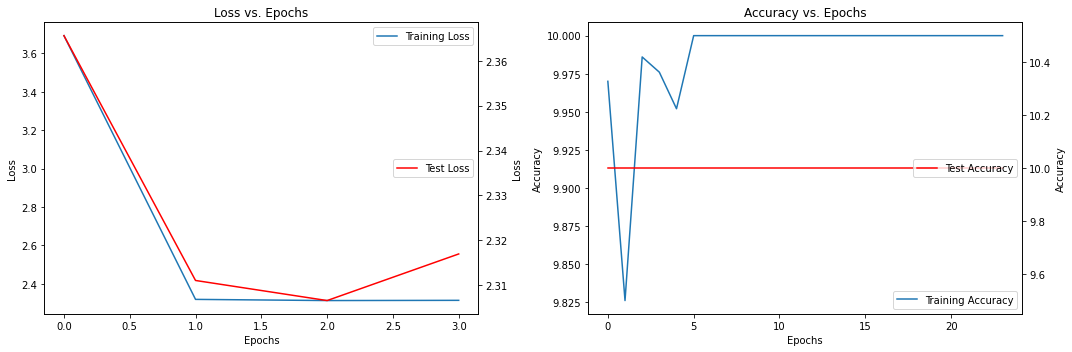

In [7]:
plot_loss_accuracy_graph_OneCLR(*history[0:4])